In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import  matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 15)


import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'..'))

# Welcome!

This is the empty notebook for plankton's data handling tutorial, which can be found at [https://link-url-here.org](https://link-url-here.org)

To make it easier, we already implemented the data loading routine that fetches Qian&al's Hippocampal ISS data set and opens it into 'qian_et_al':

### Loading ISS data

In [2]:
# #data loading

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import os 

# data_folder='../test/qian-et-al/data/leftCA1/'

# xiaoyan_et_al = pd.read_csv(os.path.join(data_folder,'spots_w_segmentation_leftCA1_4-3.csv'))

# dapi_image = plt.imread(os.path.join(data_folder,'./CA1DapiBoundaries_4-3_left.tif'))
# dapi_image = 1-(dapi_image/dapi_image.max())

# #display pandas data set
# xiaoyan_et_al

### Loading spot data 

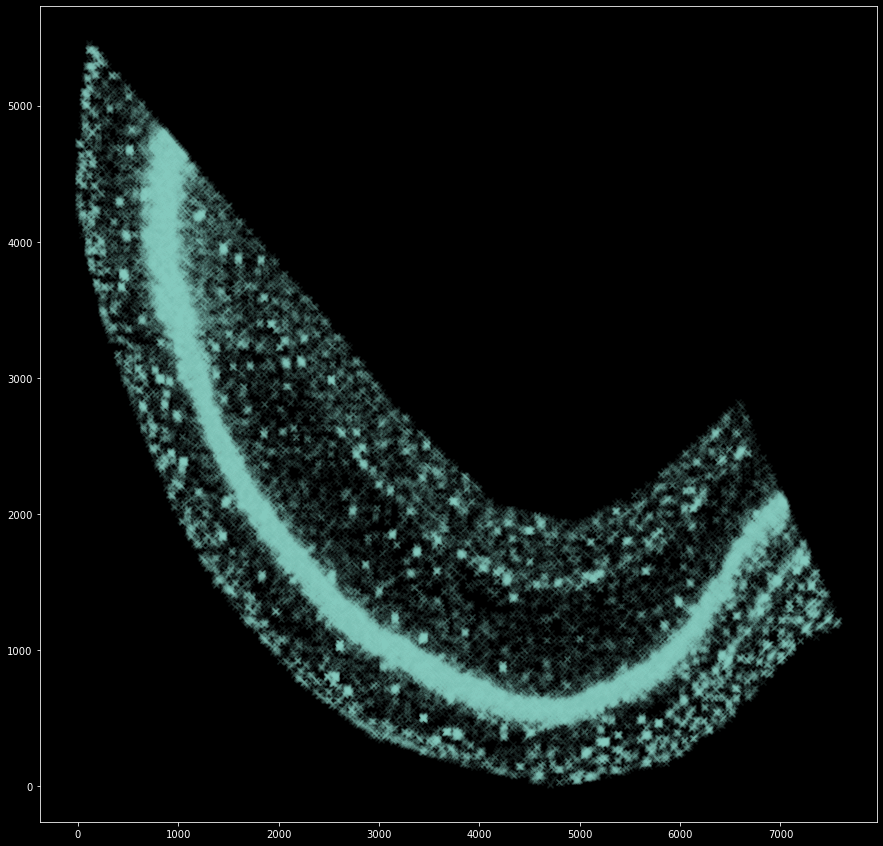

In [20]:
import requests
import io

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ISS_url = 'https://github.com/acycliq/pciSeq/blob/dev/pciSeq/data/mouse/ca1/iss/spots.csv?raw=true'

response = requests.get(ISS_url)
response.raise_for_status()
spot_data = pd.read_csv(io.BytesIO(response.content),)
# plt.imshow(cell_map,cmap='nipy_spectral')
plt.scatter(spot_data.x,spot_data.y,marker='x',alpha=0.1)

In [21]:
import plankton.plankton as pl


sdata = pl.SpatialData(
                      x_coordinates=spot_data.x,
                      y_coordinates=spot_data.y,
                      genes=spot_data.Gene,
                      )

In [12]:
knn_neighbors=200
bandwidth=60
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



In [6]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [14]:
sdata.save('/home/sebastian/Documents/kewl.pl')

In [15]:
sdata1 = pl.load('/home/sebastian/Documents/kewl.pl')

Index(['g', 'x', 'y', 'gene_id'], dtype='object')


In [17]:
sdata1.graph.umap

array([[ 0.37907535, 13.949678  ],
       [ 0.36802   , 13.9011965 ],
       [ 0.38248518, 13.961141  ],
       ...,
       [-0.49297357, 16.440722  ],
       [-0.19298166, 15.075266  ],
       [-0.19267707, 15.082811  ]], dtype=float32)

In [7]:
plt.figure(figsize=(7,7))

# sdata_pyramidal.scatter(c=sdata_pyramidal.graph.umap[:,0],cmap='winter')

sdata_pyramidal.graph.plot_umap(c=sdata_pyramidal.graph.umap[:,0],cmap='winter')
sdata_alveus.graph.plot_umap(c=sdata_alveus.graph.umap[:,1],cmap='Greys')
sdata_radiatum.graph.plot_umap(c=sdata_radiatum.graph.umap[:,1],cmap='autumn')

NameError: name 'sdata_pyramidal' is not defined

<Figure size 504x504 with 0 Axes>

(<matplotlib.collections.PathCollection at 0x7f5c267c4580>, None, None)

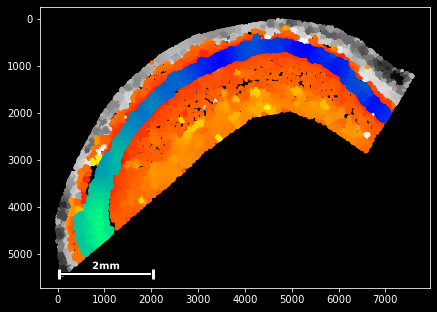

In [69]:
plt.figure(figsize=(7,7))

# sdata_pyramidal.scatter(c=sdata_pyramidal.graph.umap[:,0],cmap='winter')

sdata_alveus.scatter(c=sdata_alveus.graph.umap[:,1],cmap='Greys')
sdata_radiatum.scatter(c=sdata_radiatum.graph.umap[:,1],cmap='autumn',scalebar=False)
sdata_pyramidal.scatter(c=sdata_pyramidal.graph.umap[:,0],cmap='winter',scalebar=False)

(-14.22875452041626, 19.568485736846924, -14.37635097503662, 22.03527126312256)

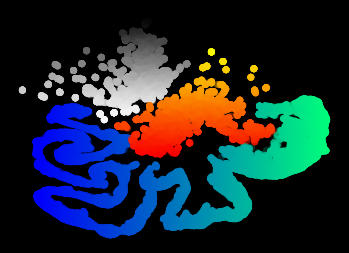

In [29]:
plt.figure(figsize=(6,4.4))

sdata[sdata.alveus].graph.plot_umap(c=sdata[sdata.alveus].graph.umap[:,1], alpha=0.2,cmap='Greys')
sdata[sdata.pyramidal].graph.plot_umap(c=sdata[sdata.pyramidal].graph.umap[:,0], alpha=0.2,cmap='winter')
sdata[sdata.radiatum].graph.plot_umap(c=sdata[sdata.radiatum].graph.umap[:,1], alpha=0.2,cmap='autumn')

# sdata[sdata.pyramidal].graph.plot_umap(c=sdata[sdata.pyramidal].graph.umap[:,0], alpha=0.2,cmap='winter')
# sdata[sdata.radiatum].graph.map_and_umap(c=sdata[sdata.radiatum].graph.umap[:,1], alpha=0.2,marker='x',scalebar=False,cmap='autumn')
plt.axis('off')

(-380.05, 7959.05, 5729.35, -262.35)

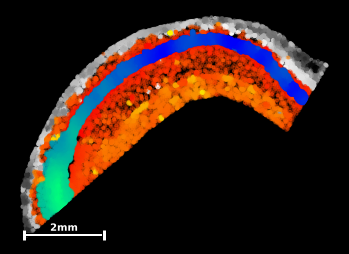

In [28]:
plt.figure(figsize=(6,6))

sdata[sdata.alveus].scatter(c=sdata[sdata.alveus].graph.umap[:,1], alpha=0.2,cmap='Greys',scalebar=False)
sdata[sdata.radiatum].scatter(c=sdata[sdata.radiatum].graph.umap[:,1], alpha=0.2,cmap='autumn',scalebar=False)
sdata[sdata.pyramidal].scatter(c=sdata[sdata.pyramidal].graph.umap[:,0], alpha=0.2,cmap='winter')


# sdata[sdata.pyramidal].graph.plot_umap(c=sdata[sdata.pyramidal].graph.umap[:,0], alpha=0.2,cmap='winter')
# sdata[sdata.radiatum].graph.map_and_umap(c=sdata[sdata.radiatum].graph.umap[:,1], alpha=0.2,marker='x',scalebar=False,cmap='autumn')
plt.axis('off')

In [33]:
sdata_p = sdata[sdata.pyramidal]

In [85]:
coordinates_centered=((sdata_p.coordinates+np.array([-4200,-3450])))

phi = 0.42

rot_mat = np.array([[np.cos(phi),-np.sin(phi),],[np.sin(phi),np.cos(phi),]])
coordinates_centered = np.inner(coordinates_centered,rot_mat)

rads = (np.arctan(coordinates_centered[:,0]/coordinates_centered[:,1]))

sdata_p['phi']=rads



In [156]:
cooc = sdata.stats.co_occurrence(resolution=5,max_radius=100, category=None)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


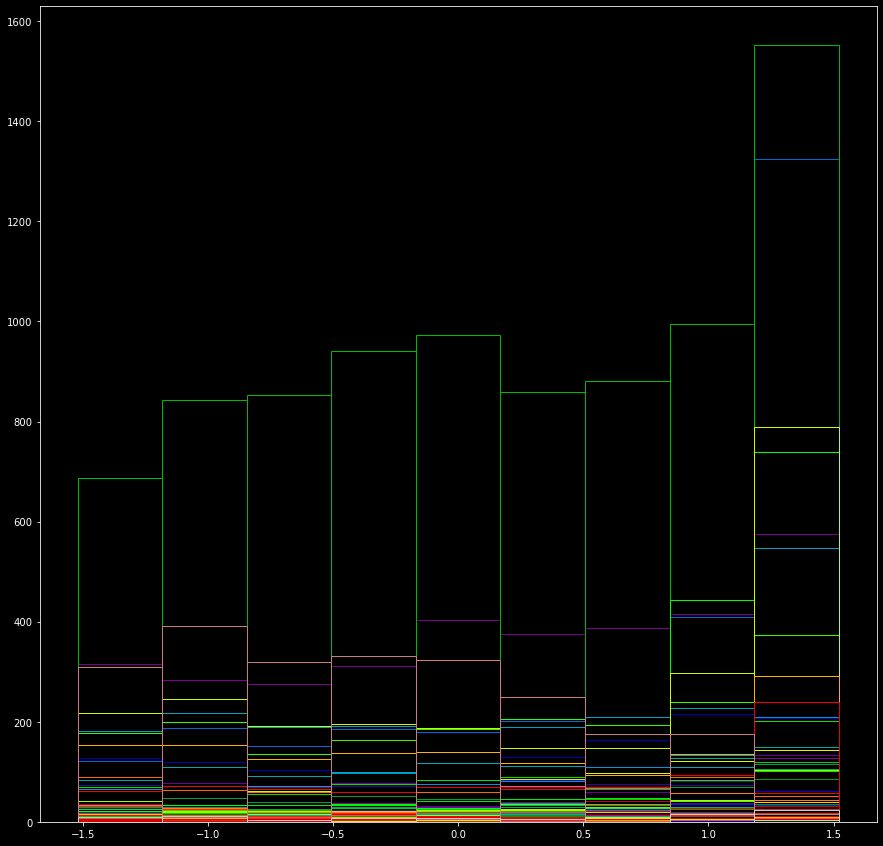

In [128]:
handlers = []
vals = []
for g in sdata_p.genes[sdata_p.counts>30]:
    val,_,_=plt.hist(sdata_p[sdata_p.g==g].phi,color=(0,0,0,0),ec=sdata_p.obsc.c_genes[g],bins=np.linspace(-1.52,1.52,10))
    vals.append(val.copy())
vals=np.array(vals)

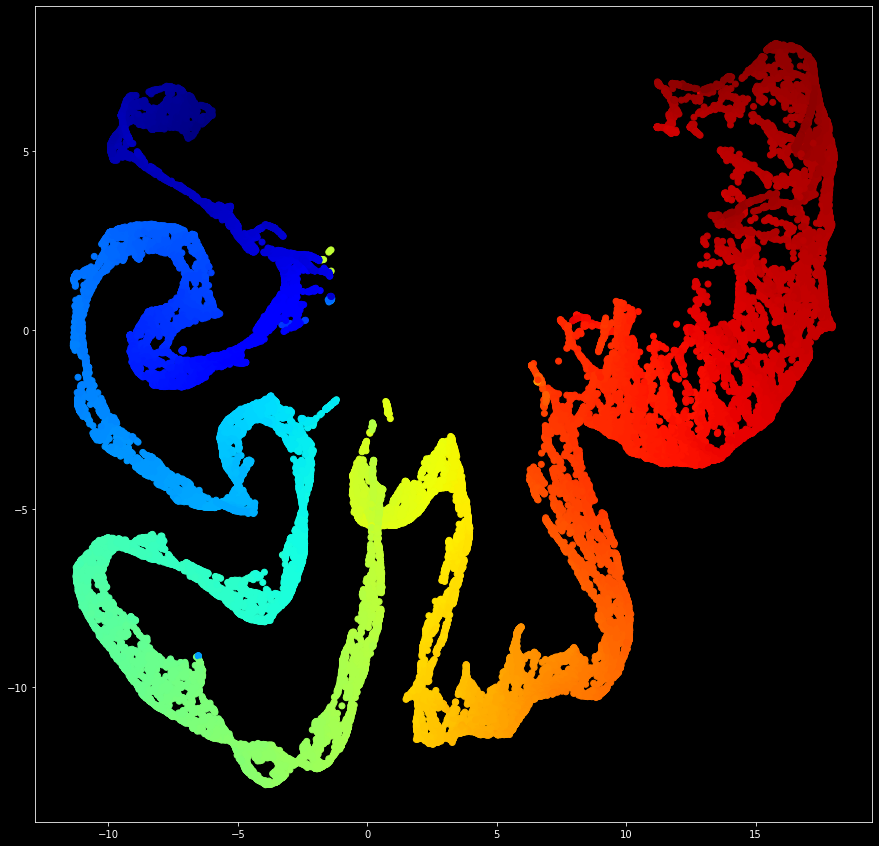

In [152]:
sdata_p.graph.plot_umap(c=sdata_p.phi,cmap='jet')

(<matplotlib.collections.PathCollection at 0x7f19f8923fd0>, None, None)

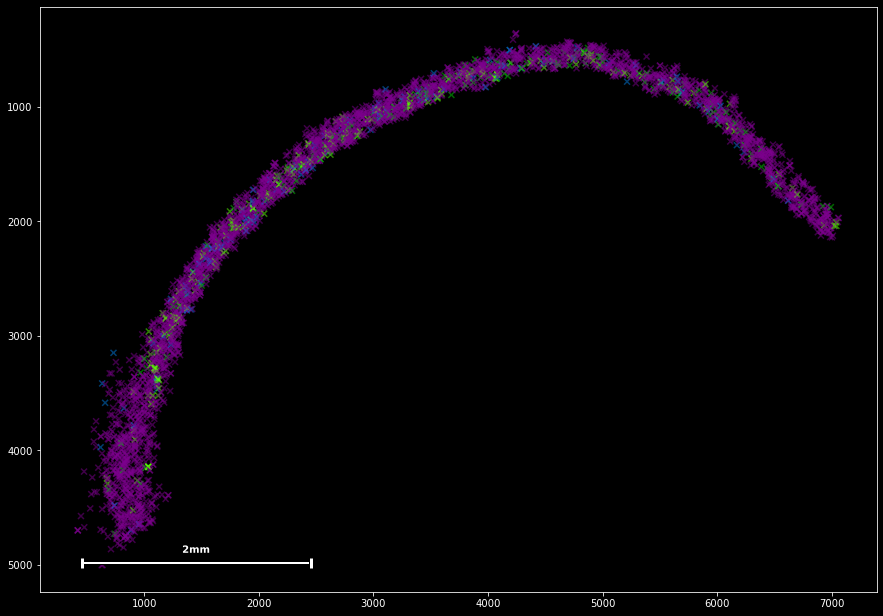

In [149]:
# sdata_p[sdata_p.g.isin(['Pcp4','Wfs1','Rgs4'])].scatter(marker='x',alpha=0.1)
sdata_p[sdata_p.g.isin(['Nov','Cpne5','Penk','3110035E14Rik'])].scatter(marker='x',alpha=0.5)

''

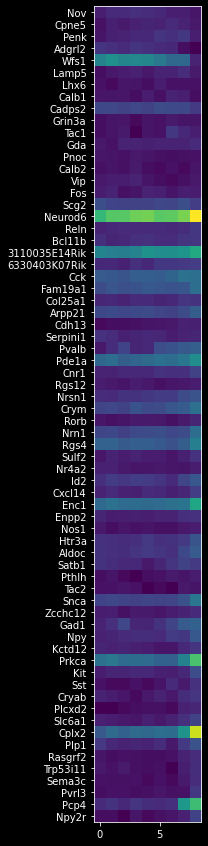

In [145]:
span = np.linspace(-1,1,vals.shape[1])**2

idcs = np.argsort(((vals/vals.sum(1)[:,None])*span).sum(1))

plt.imshow((vals)[idcs]**0.5)

plt.yticks(np.arange(vals.shape[0]),(sdata_p.genes[sdata_p.counts>30])[idcs])
''

In [ ]:
sdata.scatter(c=sdata.graph.umap[:,0]+sdata.graph.umap[:,1]*0.3)

In [ ]:
sdata.scatter(c=sdata.graph.umap[:,1],cmap='autumn',vmin=0,vmax=10)

In [ ]:
tissues = ['radiatum','pyramidal','alveus']

tissue = np.argmax(sdata[tissues].to_numpy(),axis=1)
sdata['tissue']=(pd.Series(tissues)[tissue.astype(int)]).astype('category').values

In [ ]:
fig = plt.figure(figsize=(20,8), constrained_layout=True)
spec = fig.add_gridspec( 1,3)

ax0 = fig.add_subplot(spec[:,:1])

sdata[sdata.alveus].graph.plot_umap(c=sdata[sdata.alveus].graph.umap[:,1],cmap='Greys')
sdata[sdata.radiatum].graph.plot_umap(c=-sdata[sdata.radiatum].graph.umap[:,1],cmap='autumn')
sdata[sdata.pyramidal].graph.plot_umap(c=np.multiply(-sdata[sdata.pyramidal].graph.umap,[1,-0.5]).sum(1),cmap='winter')

ax1 = fig.add_subplot(spec[:,1:])
sdata[sdata.alveus].scatter(c=sdata[sdata.alveus].graph.umap[:,1],cmap='Greys',scalebar=False)
sdata[sdata.radiatum].scatter(c=-sdata[sdata.radiatum].graph.umap[:,1],cmap='autumn',alpha=0.5)
sdata[sdata.pyramidal].scatter(c=np.multiply(-sdata[sdata.pyramidal].graph.umap,[1,-0.5]).sum(1),cmap='winter',scalebar=False)

In [ ]:
signatures = sdata.scanpy.generate_signatures()

In [ ]:
sdata.graph.plot_umap(c=(np.argmax(signatures.to_numpy(),axis=0)==1)[sdata.gene_ids])

In [ ]:
import utils

out = utils.ssam(sdata)

In [ ]:
np.array(out)

In [191]:
out = sdata[sdata.cell!=0].squidpy(groupby='cell')

/home/sebastian/src/planktonpy/tutorials/../plankton/plankton.py:764: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=var, obsm=obsm)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [696]:
candidates = np.subtract(candidates,min(candidates))
candidates/=candidates.sum()
np.random.choice(np.arange(len(candidates)),p=candidates)

23

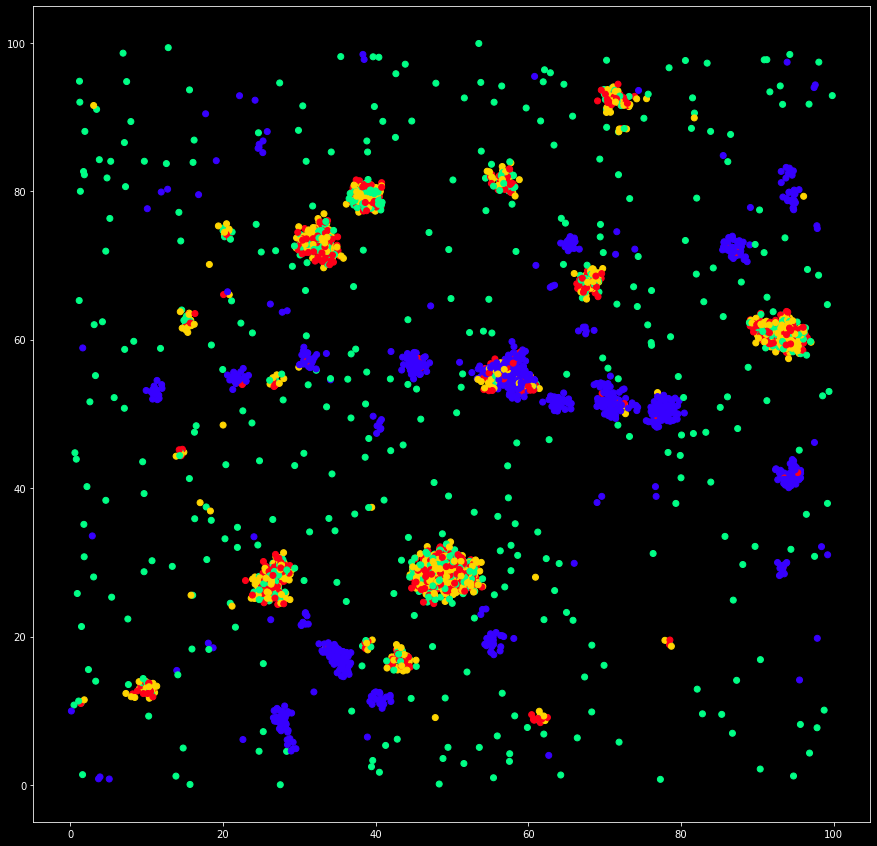

In [746]:

n_classes = 4
n_spots = 4000

coordinates = np.zeros((n_spots,2))
classes = np.arange((n_spots),dtype=int)%n_classes

area_size = 100
attraction_bandwidth = 5

def distances(c,n):
    return((c-n)**2).sum(1)**0.5

attraction = np.random.normal(size=(n_classes,n_classes))
# attraction-=3
attraction = np.tril(attraction) + np.triu(attraction.T, 1)

# attraction[np.arange(n_classes),np.arange(n_classes)]+=4
# attraction= attraction-3

attraction-=attraction.mean()-0.5

coordinates[:n_classes]=   np.random.uniform(size=(n_classes,2))*area_size 

for i in range(n_classes,n_spots):
    
    classes[i]
    
    candidates = []
    ds = []
    for j in range(100):
        d = np.random.uniform(size=(2,))*area_size
        dists = distances(coordinates[:i],d)
        effects= (np.exp(-dists**2)*attraction[classes[i],classes[:i]]).sum(0)
        candidates.append(effects)
        ds.append(d)
    candidates = np.subtract(candidates,min(candidates))
    candidates = candidates**5
    candidates/=candidates.sum()
    winner =  np.random.choice(np.arange(len(candidates)),p=candidates)
    coordinates[i]=ds[winner]
    
plt.scatter(*coordinates.T,c=classes,cmap='hsv',vmin=-0.5)

(<matplotlib.collections.PathCollection at 0x7f96a282a7f0>, None, None)

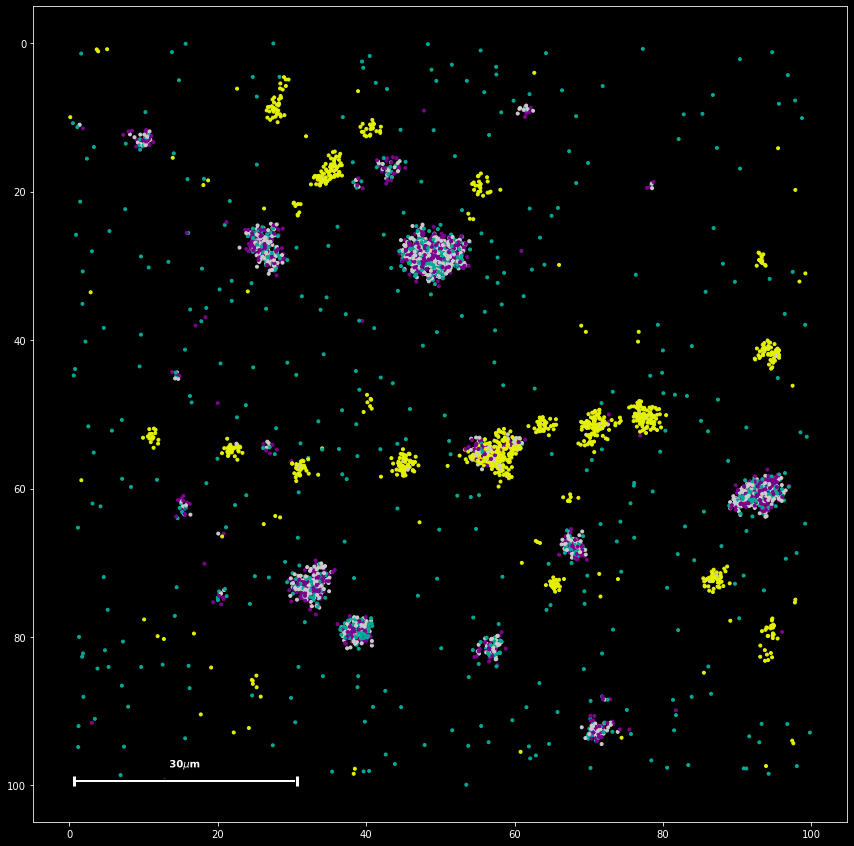

In [774]:
import plankton.plankton as pl
sdata=pl.SpatialData(genes=classes.astype(str),x_coordinates=coordinates[:,0],y_coordinates=coordinates[:,1])
sdata.scatter()

In [775]:
knn_neighbors=190
bandwidth=2
n_neighbors=105
metric='euclidean'
min_dist=1.
random_state=42
zero_weight=11.0

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



(-0.5, 3.5, 3.5, -0.5)

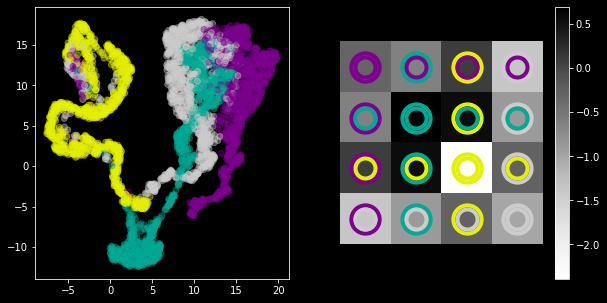

In [776]:
import matplotlib.patheffects as PathEffects


plt.figure(figsize=(10,5))

plt.subplot(121)
sdata.graph.plot_umap(alpha=0.4)
# plt.colorbar()

plt.subplot(122)

plt.imshow(-attraction,cmap='Greys')
plt.colorbar()

for i in range(n_classes):
    for j in range(n_classes):
        plt.scatter(i,j,color=sdata.obsc.c_genes[i],s=800,facecolor=(0,0,0,0),linewidths=4)
        plt.scatter(i,j,color=sdata.obsc.c_genes[j],s=400,facecolor=(0,0,0,0),linewidths=4)
#         txt = plt.text(i,j,f"{attraction[i,j]:1.2f}",va='center',ha='center',fontweight='bold',fontsize=15,color='w')
#         txt.set_path_effects(
#             [PathEffects.withStroke(linewidth=4, foreground='k')])
plt.axis('off')

In [777]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

(-0.5, 4.5, 4.5, -0.5)

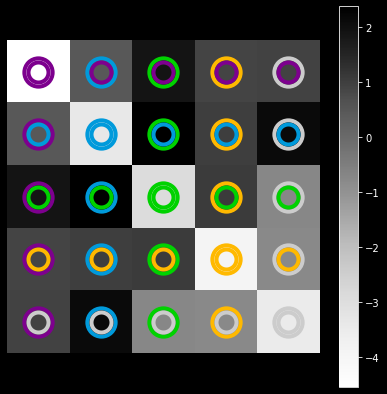

(<matplotlib.collections.PathCollection at 0x7f96a2218bb0>, None, None)

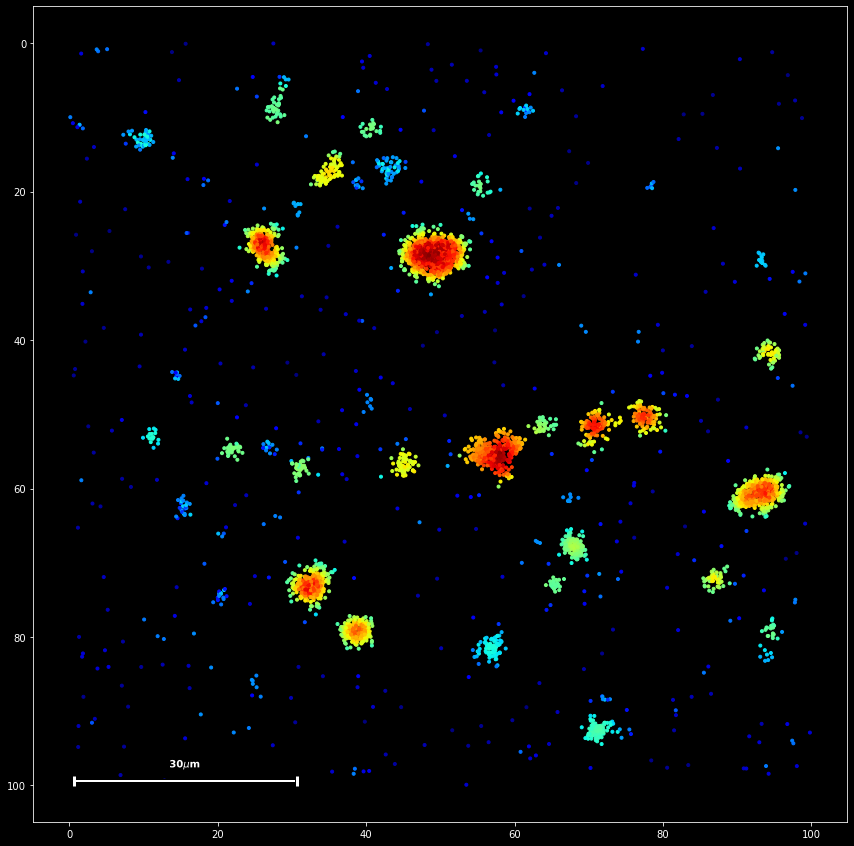

In [781]:
sdata.scatter(c=sdata.graph.umap[:,1])